In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [32]:
fuerzaBruta = pd.read_csv('outputFede/fuerzaBruta.csv')
backtracking = pd.read_csv('outputFede/backtracking.csv')
programacionDinamica = pd.read_csv('outputFede/programacionDinamica.csv')


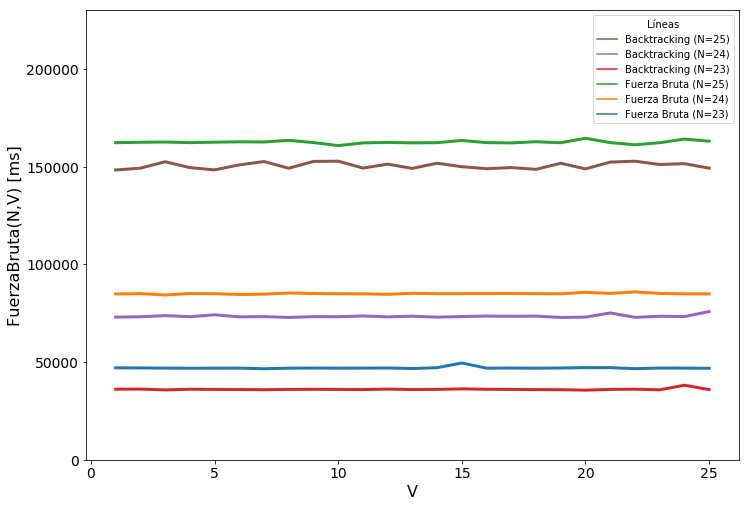

In [49]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)


ax1 = sns.lineplot(x="V", y="Tiempo", data=fuerzaBruta.loc[fuerzaBruta['N'] == 23], label="Fuerza Bruta (N=23)",ax=ax);
ax1 = sns.lineplot(x="V", y="Tiempo", data=fuerzaBruta.loc[fuerzaBruta['N'] == 24], label="Fuerza Bruta (N=24)",ax=ax);
ax1 = sns.lineplot(x="V", y="Tiempo", data=fuerzaBruta.loc[fuerzaBruta['N'] == 25], label="Fuerza Bruta (N=25)",ax=ax);

ax1 = sns.lineplot(x="V", y="Tiempo", data=backtracking.loc[backtracking['N'] == 23], label="Backtracking (N=23)",ax=ax);
ax1 = sns.lineplot(x="V", y="Tiempo", data=backtracking.loc[backtracking['N'] == 24], label="Backtracking (N=24)",ax=ax);
ax1 = sns.lineplot(x="V", y="Tiempo", data=backtracking.loc[backtracking['N'] == 25], label="Backtracking (N=25)",ax=ax);
#Reverse legends
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(reversed(handles), reversed(labels), title='Líneas', loc='upper right')

plt.ylabel("FuerzaBruta(N,V) [ms]", fontsize=16);
plt.xlabel("V", fontsize=16);
plt.ylim(0,230000)
plt.tick_params(labelsize=14);
plt.setp(ax.lines,linewidth=3);
plt.savefig("outputFede/graficoFuerzaBrutaYBacktrackingVNoInfluye.png");

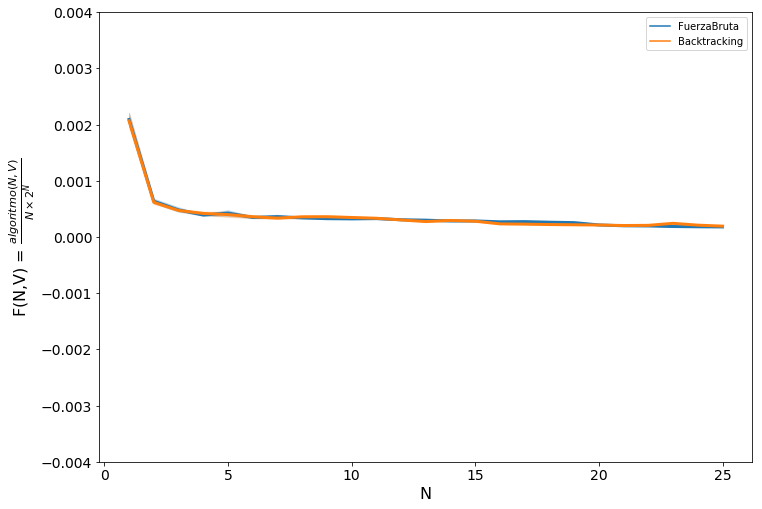

In [50]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

backtracking['FB/N*2^N'] = backtracking['Tiempo'] / (backtracking['N'] * (2**backtracking['N']));
fuerzaBruta['FB/N*2^N'] = fuerzaBruta['Tiempo'] / (fuerzaBruta['N'] * (2**fuerzaBruta['N']));

ax1 = sns.lineplot(x="N", y="FB/N*2^N", data=backtracking.reset_index(), label="FuerzaBruta", ax=ax);
ax1 = sns.lineplot(x="N", y="FB/N*2^N", data=fuerzaBruta.reset_index(), label="Backtracking", ax=ax);
plt.ylim(-0.004,0.004);

plt.ylabel(r"F(N,V) = $\frac{algoritmo(N, V)}{N\times 2^{N}}$", fontsize=16);
plt.xlabel("N", fontsize=16);
plt.tick_params(labelsize=14)
plt.setp(ax.lines,linewidth=3)
plt.savefig("outputFede/fuerzaBrutaBacktracking-Complejidad.png")

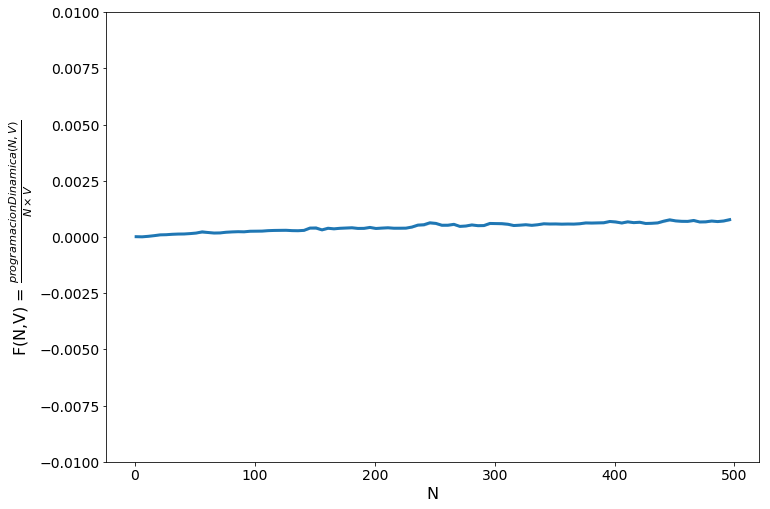

In [99]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

programacionDinamica['FB/N*V'] = programacionDinamica['Tiempo'] / (programacionDinamica['N'] * (programacionDinamica['V']));

ax1 = sns.lineplot(x="N", y="FB/N*V", data=programacionDinamica.reset_index(), ax=ax);
plt.ylim(-0.010,0.010);

plt.ylabel(r"F(N,V) = $\frac{programacionDinamica(N, V)}{N\times V}$", fontsize=16);
plt.xlabel("N", fontsize=16);
plt.tick_params(labelsize=14)
plt.setp(ax.lines,linewidth=3)
plt.savefig("outputFede/graficoProgramacionDinamica_Complejidad.png")

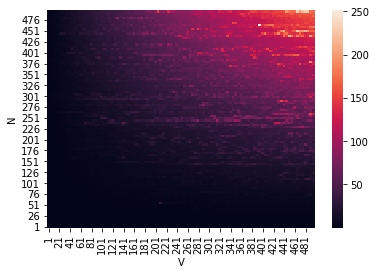

In [95]:
heat_df = programacionDinamica.pivot("N", "V", "Tiempo");
ax = sns.heatmap(heat_df)
ax.invert_yaxis()
plt.savefig("outputFede/graficoProgramacionDinamica_Calor.png")

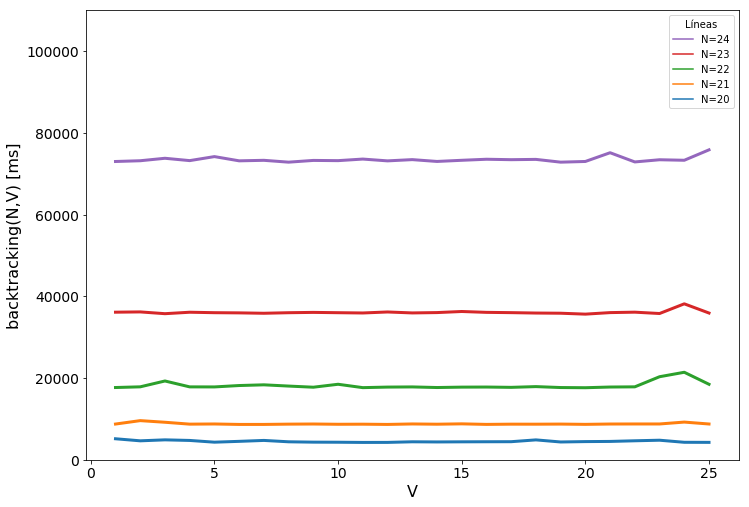

In [37]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)


ax1 = sns.lineplot(x="V", y="Tiempo", data=backtracking.loc[backtracking['N'] == 20], label="N=20",ax=ax);
ax1 = sns.lineplot(x="V", y="Tiempo", data=backtracking.loc[backtracking['N'] == 21], label="N=21",ax=ax);
ax1 = sns.lineplot(x="V", y="Tiempo", data=backtracking.loc[backtracking['N'] == 22], label="N=22",ax=ax);
ax1 = sns.lineplot(x="V", y="Tiempo", data=backtracking.loc[backtracking['N'] == 23], label="N=23",ax=ax);
ax1 = sns.lineplot(x="V", y="Tiempo", data=backtracking.loc[backtracking['N'] == 24], label="N=24",ax=ax);

#Reverse legends
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(reversed(handles), reversed(labels), title='Líneas', loc='upper right')

plt.ylabel("backtracking(N,V) [ms]", fontsize=16);
plt.xlabel("V", fontsize=16);
plt.ylim(0,110000);
plt.tick_params(labelsize=14)
plt.setp(ax.lines,linewidth=3)
plt.savefig("outputFede/graficobacktracking_V_No_Influye.png")

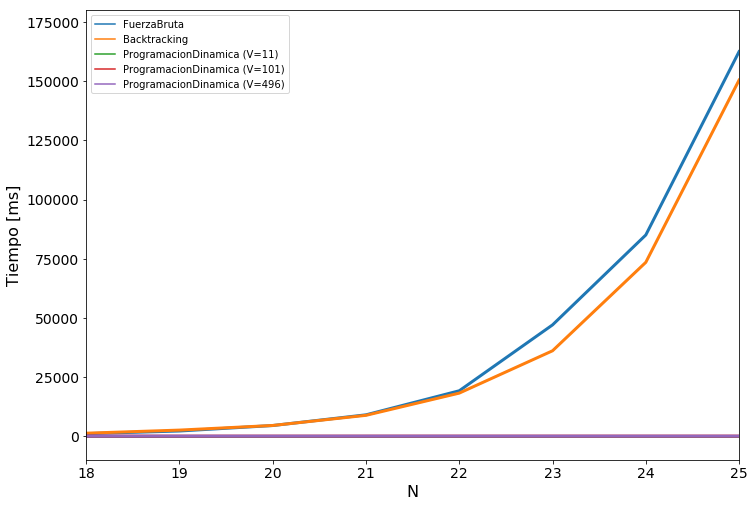

In [52]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax1 = sns.lineplot(x="N", y="Tiempo", data=fuerzaBruta.reset_index(), label="FuerzaBruta", ax=ax);
ax1 = sns.lineplot(x="N", y="Tiempo", data=backtracking.reset_index(), label="Backtracking", ax=ax);
ax1 = sns.lineplot(x="N", y="Tiempo", data=programacionDinamica.loc[programacionDinamica['V'] == 11], label="ProgramacionDinamica (V=11)", ax=ax);
ax1 = sns.lineplot(x="N", y="Tiempo", data=programacionDinamica.loc[programacionDinamica['V'] == 101], label="ProgramacionDinamica (V=101)", ax=ax);
ax1 = sns.lineplot(x="N", y="Tiempo", data=programacionDinamica.loc[programacionDinamica['V'] == 496], label="ProgramacionDinamica (V=496)", ax=ax);

plt.ylim(-10000,180000);
plt.xlim(18,25);
plt.ylabel(r"Tiempo [ms]", fontsize=16);
plt.xlabel("N", fontsize=16);
plt.tick_params(labelsize=14)
plt.setp(ax.lines,linewidth=3)
plt.savefig("outputFede/comparacionFinal.png")

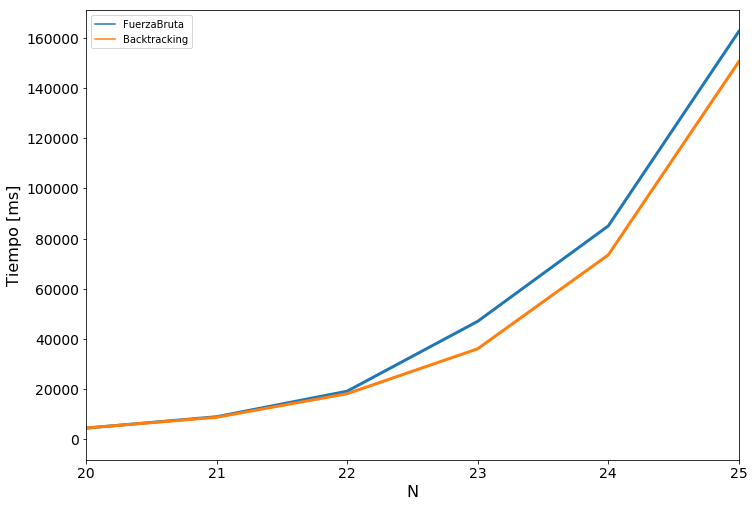

In [51]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax1 = sns.lineplot(x="N", y="Tiempo", data=fuerzaBruta.reset_index(), label="FuerzaBruta", ax=ax);
ax1 = sns.lineplot(x="N", y="Tiempo", data=backtracking.reset_index(), label="Backtracking", ax=ax);
plt.xlim(20,25)
plt.ylabel(r"Tiempo [ms]", fontsize=16);
plt.xlabel("N", fontsize=16);
plt.tick_params(labelsize=14)
plt.setp(ax.lines,linewidth=3)
plt.savefig("outputFede/graficoBacktrackingYFuerzaBruta.png")